# FEEDBACK: 

## UPDATED: For scenario 1, you should have gotten 24 outliers for the non-smoker charges group. 
## For scenario 3, you did not run the levene's test. Also, you should have run the kruskai wallis test after falling the levene's test

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

## For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

### 1. State your Null Hypothesis and Alternative Hypothesis
Null Hypothesis = Smokers and non-smokers have the same insurance charges.

Alternative Hypothesis = Smokers have DIFFERENT insurance charges than non-smokers.

### 2. Select the correct test according to the data type and number of samples: 
T-TEST

### 6. Show a supporting visualization that helps display the result

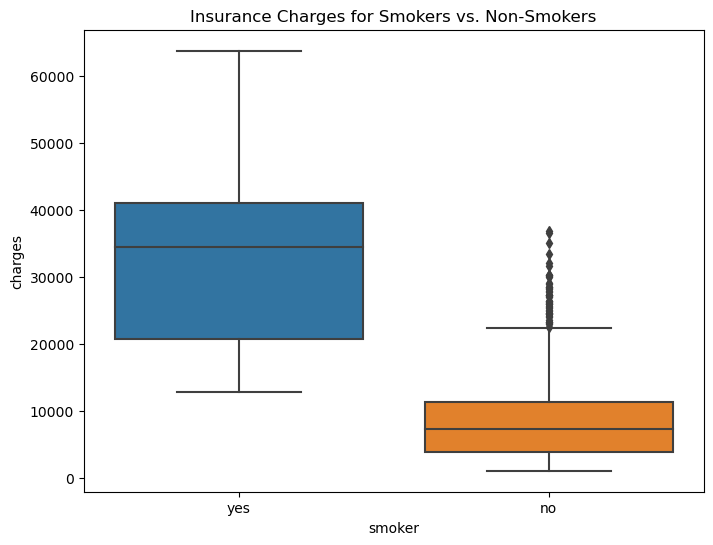

In [3]:
# Create the chart using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges for Smokers vs. Non-Smokers')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions) / 3. Test the assumptions of your selected test.

1. No significant outliers

2. Normality 

3. Equal Variance 

In [4]:
# see how many smoker/ non-smoker
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# Filtering out those smoker/non-smoker
smoker_df = df.loc[df['smoker']== 'yes'].copy()
no_smoker_df = df.loc[df['smoker']== 'no'].copy()

In [6]:
#Define our feature of interest
smoker_charges = smoker_df['charges']
no_smoker_charges = no_smoker_df['charges']

In [7]:
zscores_s = stats.zscore(smoker_charges)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [8]:
zscores_ns = stats.zscore(no_smoker_charges)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)

24

In [9]:
# test the smoker charges for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges


NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [10]:
# test the non-smoker charges for normality
result_no_smoker_charges = stats.normaltest(no_smoker_charges)
result_no_smoker_charges


NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

 Both are below .05 so our p-values for both groups are well below 0.05, which means our data is NOT normally distributed. 

In [11]:
# Test for equal variance
result = stats.levene(smoker_charges, no_smoker_charges)
result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [12]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, no_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 
- Our p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between the chargers of smoker/non-smoker 


# Q2. Are men more likely to smoke than women?

### 1. State your Null Hypothesis and Alternative Hypothesis
Null Hypothesis = NO RELATIONSHIP BETWEEN SEX AND SMOKING.The proportion of men who smoke = proportion of women who smoke. 

Alternative Hypothesis = RELATIONSHIP BETWEEN SEX AND SMOKING. The proportion of men who smoke NOT= proportion of women who smoke.

### 2. Select the correct test according to the data type and number of samples: 
Chi-Squared

### 6. Show a supporting visualization that helps display the result

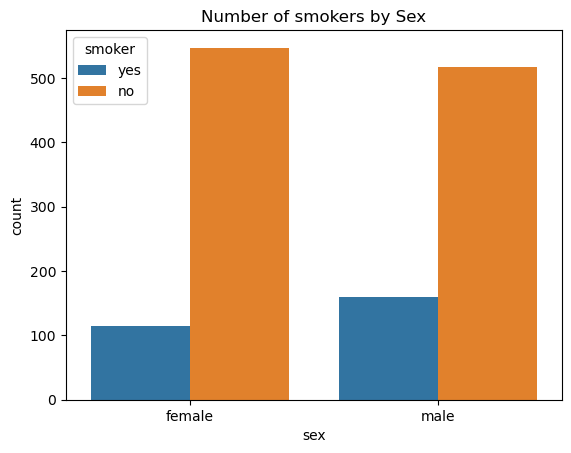

In [13]:
# First, let's visualize result by sex.
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by Sex");

### 3. Test the assumptions of your selected test.

Chi-squared assumptions are:
1. Two variables: sex and smoker/non-smoker
2. Two variables should be categorical

In [14]:
# how many observations from each group variable (Sex) fell into which category in the target (smoker)
table = pd.crosstab(df['sex'], df['smoker'])
table


smoker,no,yes
sex,,
female,547,115
male,517,159


### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [15]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results


In [16]:
# What was our p-value?
print(p)
p<.05



0.006548143503580696


True

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 
- Since the p-value of 0.006548143503580696 is less than the significance level of 0.05, the result is statistically significant
- Reject the null hypothesis; there is actually a difference in sex (men are more likely to smoke than women)


#  Q3. Do different regions have different charges, on average?

### 1. State your Null Hypothesis and Alternative Hypothesis
Null Hypothesis = NO RELATIONSHIP BETWEEN REGION AND CHARGES.The average charges are the same across different regions. 

Alternative Hypothesis = THERE IS A RELATIONSHIP BETWEEN CHARGES.The average charges differ among different regions.

### 2. Select the correct test according to the data type and number of samples: 
ANOVA TEST

### 6. Show a supporting visualization that helps display the result

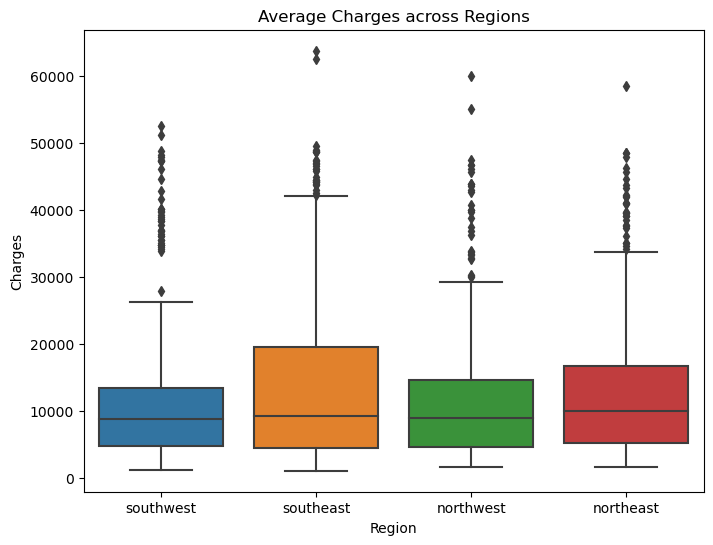

In [17]:
# Create a box plot or bar plot to visualize the average charges across different regions
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Average Charges across Regions')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

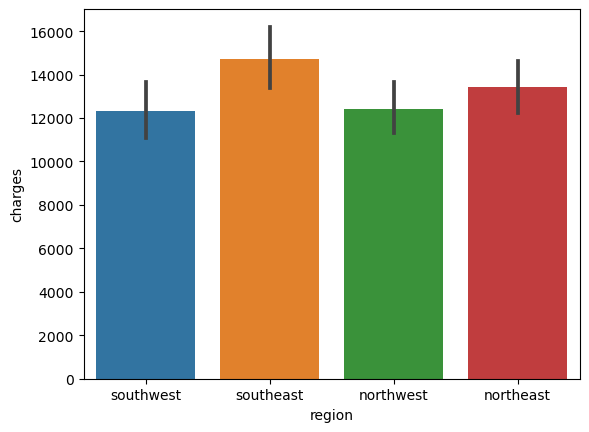

In [18]:
sns.barplot(data=df, x='region',y='charges');



### 3. Test the assumptions of your selected test.

- Normality

- Equal variance

- No significant outliers


In [19]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [20]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [21]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


# UPDATE: 

In [26]:
# not using * operator, entering each group manually
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northwest'])

LeveneResult(statistic=5.923469021836973, pvalue=0.0005169402248144528)

In [33]:
from scipy.stats import kruskal

# Assuming you have data for each group
group_data = [groups['southwest'], groups['southeast'], groups['northwest'], groups['northeast']]

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*group_data)

# Print the results
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check if the p-value is significant
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis. Differences between groups are not significant.")

Test Statistic: 4.734181215658743
P-value: 0.19232908072121002
Fail to reject the null hypothesis. Differences between groups are not significant.


### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [22]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

In [24]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


### 5. Interpret your p-value and reject or fail to reject your null hypothesis 
- the p-values are above the chosen significance level, indicating no statistically significant difference in average charges.
- the only pair that shows a statistically significant difference in average charges is Southeast vs. Southwest

